In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import torch
from torch.nn import Module
from Enums import ModelMethod, ModelName
from omegaconf import OmegaConf, DictConfig, ListConfig
from typing import List, Union
from DataPreps import makeDataFrame, makeDataset

import FeatureMapsExtractor as fme
import importlib
import ErrorAnalysisUtils as eau
import warnings
warnings.filterwarnings('ignore')
importlib.reload(fme)

<module 'FeatureMapsExtractor' from '/mnt/Development-Main/Vos/S2_Porjects/UnderstandingYou/FeatureMapsExtractor.py'>

In [2]:
config: Union[DictConfig, ListConfig] = OmegaConf.load("params.yaml")
print(config)

{'data': {'training_path': './Dataset/Training/', 'validation_path': './Dataset/Validation/', 'testing_path': './Dataset/Testing/'}, 'constant': {'vanilla_cnn': 'vanilla_cnn', 'vanilla_vgg16': 'vanilla_vgg16', 'vanilla_resnet': 'vanilla_resnet', 'vanilla_alex': 'vanilla_alex', 'vit': 'vit_swin', 'pre_vgg16': 'pretrained_vgg16', 'pre_resnet': 'pretrained_resnet', 'pre_alex': 'pretrained_alex', 'train_split': 0.75, 'batch_size': 64, 'lr': 0.001, 'img_size': 224, 'num_classes': 2, 'epoch': 30, 'lr_mile': {'_1': 14, '_2': 19, '_3': 23, '_4': 27, '_5': 28, '_6': 29}, 'best_v_alex': 0.000109, 'best_v_vgg16': 0.000104, 'best_v_cnn': 0.001, 'best_v_resnet': 0.000318, 'best_p_alex': 0.000339, 'best_p_resnet': 0.006045, 'best_p_vgg16': 0.000317, 'best_p_vit': 0.0001023}, 'fme': {'cnn_testing_path_best': './checkpoints/vanilla_cnn/best.pth', 'cnn_baseline_path_best': './checkpoints/vanilla_cnn/best.pth', 'vgg_baseline_path_best': './checkpoints/vanilla_vgg16/best.pth', 'resnet_baseline_path_best'

In [3]:
trainDf, validDf, testDf = makeDataFrame(training_path=config.data.training_path,
                      validation_path=config.data.validation_path,
                      testing_path=config.data.testing_path,
                      num_classes=config.constant.num_classes
                      )

print(trainDf["label"].value_counts())
print(validDf["label"].value_counts())
print(testDf["label"].value_counts())
print(trainDf.head())

train_loader, valid_loader, test_loader = makeDataset(
    training_path=config.data.training_path,
    validation_path=config.data.validation_path,
    testing_path=config.data.testing_path,
    num_classes=config.constant.num_classes,
    batch_size=config.constant.batch_size,
    img_size=config.constant.img_size
)

./Dataset/Training/
./Dataset/Validation/
./Dataset/Testing/
label
1    358
0    358
Name: count, dtype: int64
label
0    90
1    90
Name: count, dtype: int64
label
0    112
1    112
Name: count, dtype: int64
                                 img_path  class_name label
0     ./Dataset/Training/smoking_0005.jpg     smoking     1
1     ./Dataset/Training/smoking_0059.jpg     smoking     1
2     ./Dataset/Training/smoking_0459.jpg     smoking     1
3  ./Dataset/Training/notsmoking_0127.jpg  notsmoking     0
4     ./Dataset/Training/smoking_0392.jpg     smoking     1
./Dataset/Training/
./Dataset/Validation/
./Dataset/Testing/


In [ ]:
vanilla_modelResnet = fme.loadModelFromPath(ModelMethod.RESNET, "./checkpoints/vanilla_resnet/best.pth")

In [ ]:
importlib.reload(eau)
eau.runAlgorithm(config, vanilla_modelResnet,
                 ModelName.vanilla_resnet,
                 valid_loader)

In [4]:
pretrained_modelResnet = fme.loadPretrained(ModelMethod.RESNET, "./checkpoints/pretrained_resnet/best.pth")

Result for : $pretrained_resnet
tensor([[-0.5185,  0.5975],
        [-1.3319,  0.6569],
        [ 0.0723, -0.1648],
        [ 2.3817, -2.2800],
        [-0.1139,  0.4624],
        [ 0.8132, -0.1040],
        [ 0.4720, -0.2515],
        [ 1.8106, -2.5749],
        [ 0.2990, -0.4263],
        [-0.9809,  2.0436],
        [-0.8295,  0.6054],
        [ 0.8518, -1.3376],
        [-0.9099,  0.3830],
        [ 0.3259, -0.9044],
        [-0.6350,  0.4668],
        [ 1.7198, -2.4219],
        [ 2.5330, -3.0916],
        [ 0.6191, -0.7271],
        [ 0.8328, -1.9504],
        [ 2.5973, -2.7727],
        [-0.6865,  1.1459],
        [-1.4361,  1.1094],
        [ 1.0891, -1.4765],
        [-1.0815,  1.5828],
        [-1.4263,  1.6206],
        [-0.7802,  1.1318],
        [-1.1149,  1.9629],
        [-0.9171,  0.8425],
        [ 0.6305, -0.3792],
        [-1.1046,  1.5630],
        [-3.5762,  2.2718],
        [ 0.8251, -0.7599],
        [ 1.4922, -1.6865],
        [-0.0064, -0.6551],
        [ 2.1050

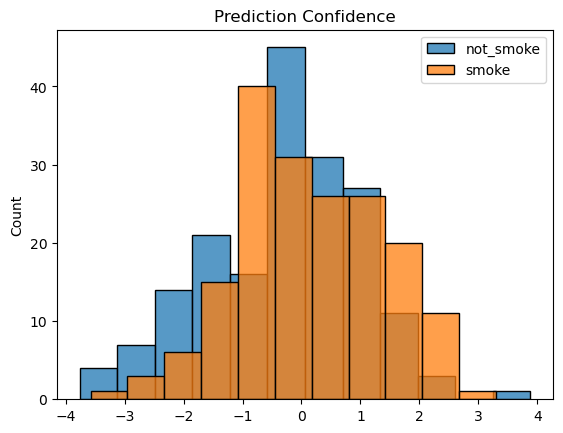

Total Missclassification for smoking:  10  from total  25  data
Total Missclassification for Not Smoking:  15 from total   25  data


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

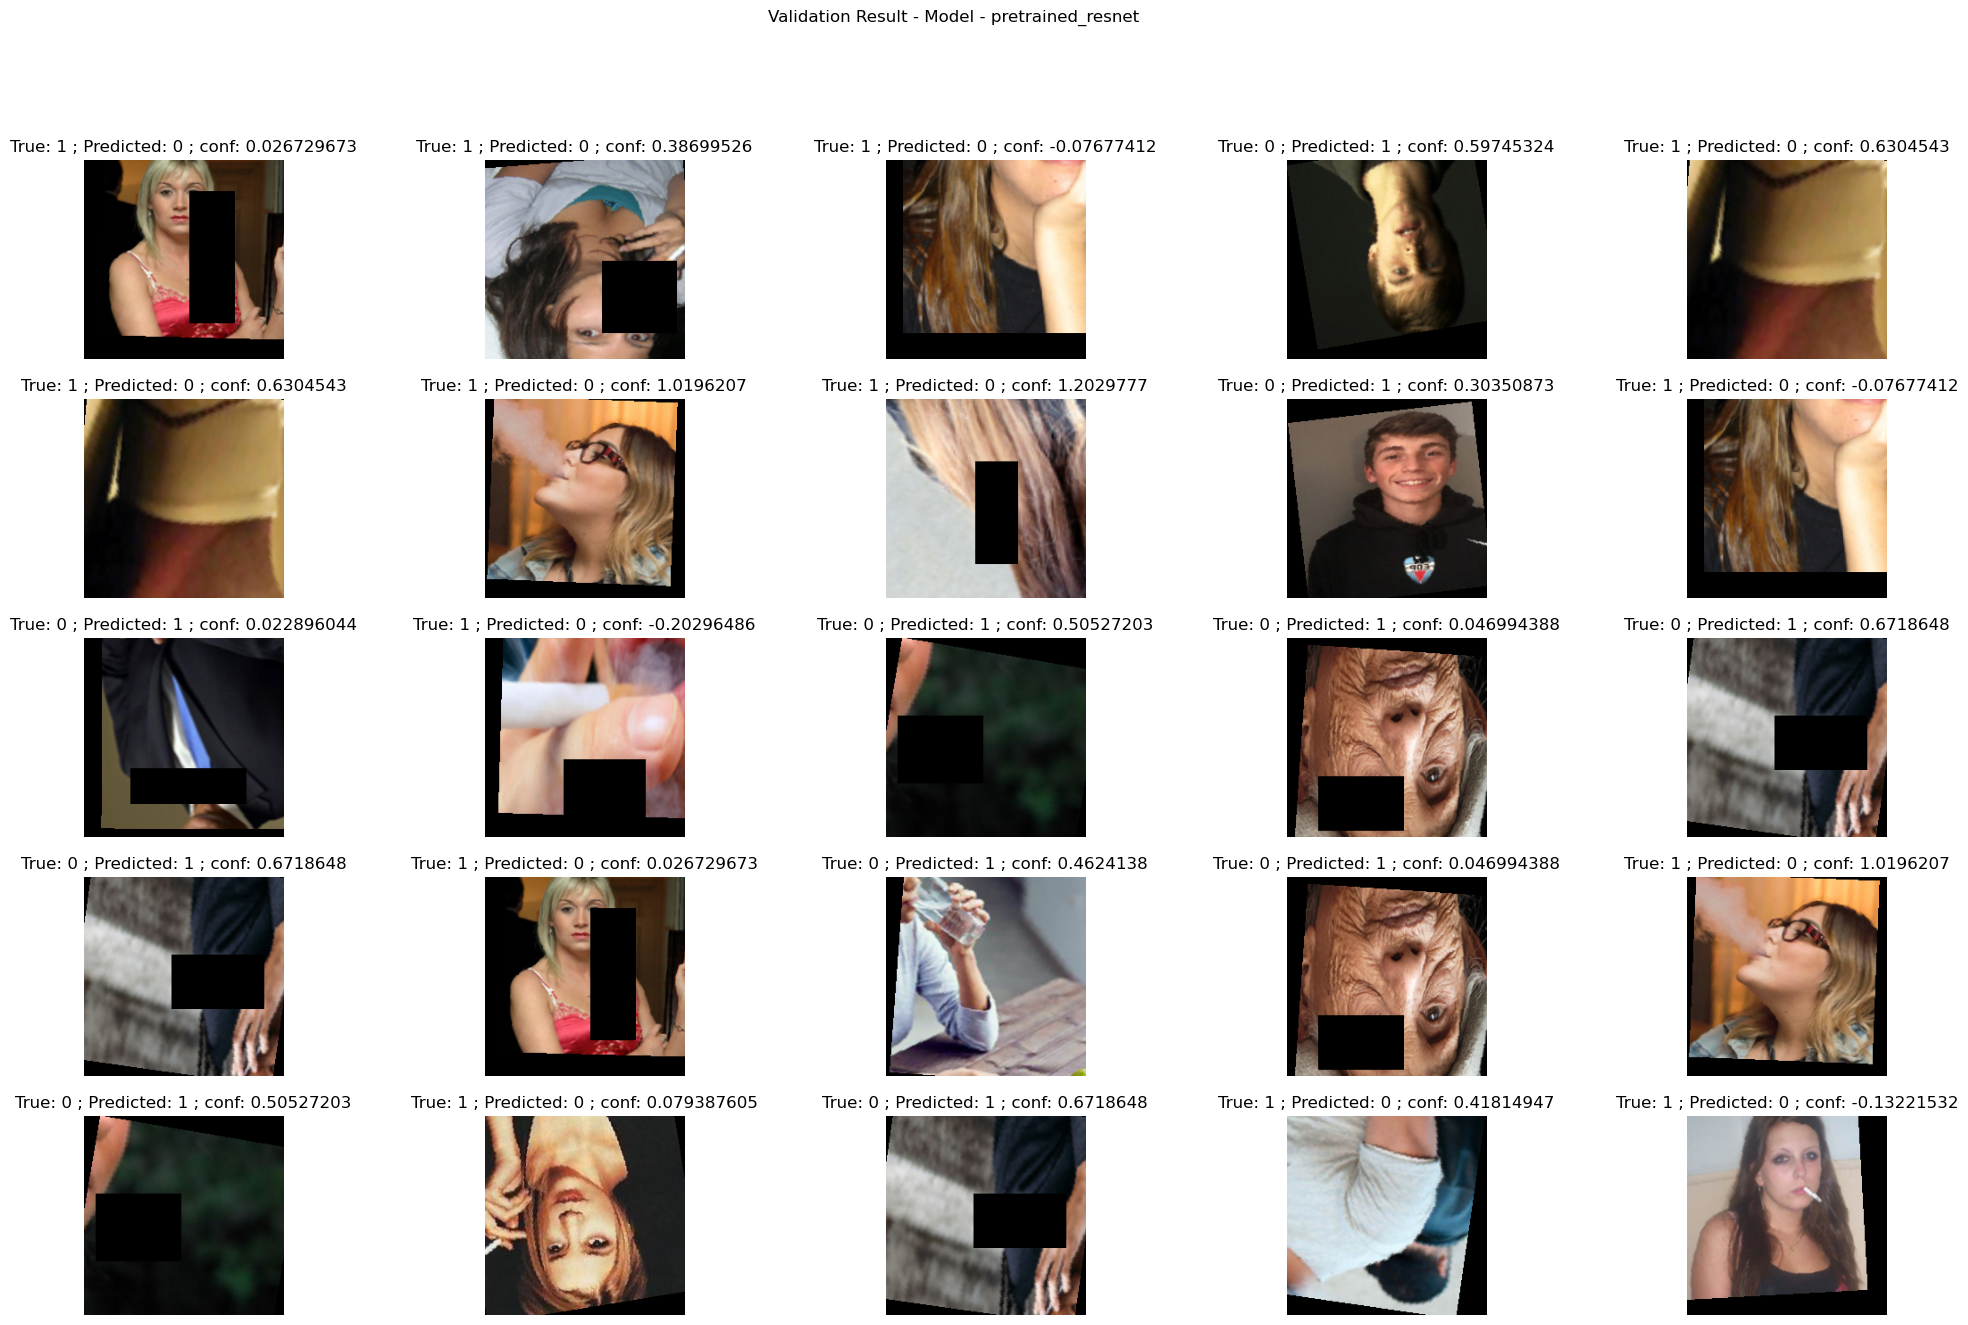

In [5]:
importlib.reload(eau)
eau.runAlgorithm(config, pretrained_modelResnet,
                 ModelName.pretrained_resnet,
                 valid_loader)